# Proyecto Deep Learning – RNN/LSTM (Datos secuenciales)

En este notebook uso una **red LSTM** para hacer análisis de sentimientos
sobre reseñas de películas del dataset **IMDB**.

Cada reseña está etiquetada como **positiva** o **negativa**. El objetivo es
entrenar un modelo que reciba una secuencia de palabras y prediga si la reseña
tiene un sentimiento positivo o negativo.


## Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

## Cargar dataset y preparar datos

In [2]:
vocab_size = 10000
maxlen = 200

(x_train_full, y_train_full), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

len(x_train_full), len(x_test)

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

len(x_train), len(x_val)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_val   = pad_sequences(x_val, maxlen=maxlen)
x_test  = pad_sequences(x_test, maxlen=maxlen)

x_train.shape, x_val.shape, x_test.shape

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((20000, 200), (5000, 200), (25000, 200))

## EDA

Longitud mínima: 11
Longitud máxima: 2494
Longitud media: 238.71364


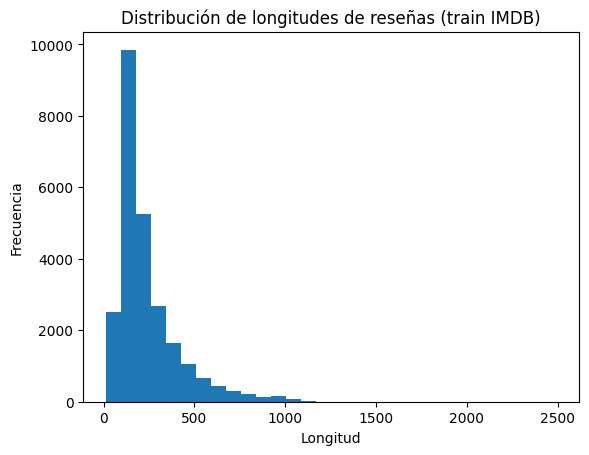

In [3]:
lengths = [len(seq) for seq in x_train_full]
print("Longitud mínima:", np.min(lengths))
print("Longitud máxima:", np.max(lengths))
print("Longitud media:", np.mean(lengths))

plt.hist(lengths, bins=30)
plt.title("Distribución de longitudes de reseñas (train IMDB)")
plt.xlabel("Longitud")
plt.ylabel("Frecuencia")
plt.show()

## LSTM

In [4]:
embedding_dim = 64

tf.random.set_seed(42)

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(64),
    Dense(1, activation="sigmoid")
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Compilar y entrenar

In [5]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=8,
    batch_size=64,
    verbose=1
)

Epoch 1/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 227ms/step - accuracy: 0.6390 - loss: 0.6096 - val_accuracy: 0.8414 - val_loss: 0.3685
Epoch 2/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 324ms/step - accuracy: 0.8793 - loss: 0.2962 - val_accuracy: 0.8744 - val_loss: 0.3277
Epoch 3/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 178ms/step - accuracy: 0.9160 - loss: 0.2210 - val_accuracy: 0.8666 - val_loss: 0.3490
Epoch 4/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 178ms/step - accuracy: 0.9354 - loss: 0.1761 - val_accuracy: 0.7950 - val_loss: 0.4606
Epoch 5/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 173ms/step - accuracy: 0.9341 - loss: 0.1770 - val_accuracy: 0.8522 - val_loss: 0.3841
Epoch 6/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 182ms/step - accuracy: 0.9544 - loss: 0.1276 - val_accuracy: 0.8172 - val_loss: 0.5157
Epoch 7/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 176ms/step - accuracy: 0.9613 - loss: 0.1084 - val_accuracy: 0.8172 - val_loss: 0.6171
Epoch 8/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 173ms/step - accuracy: 0.9610 - loss: 0.1113 -

## Curvas de pérdida y accuracy

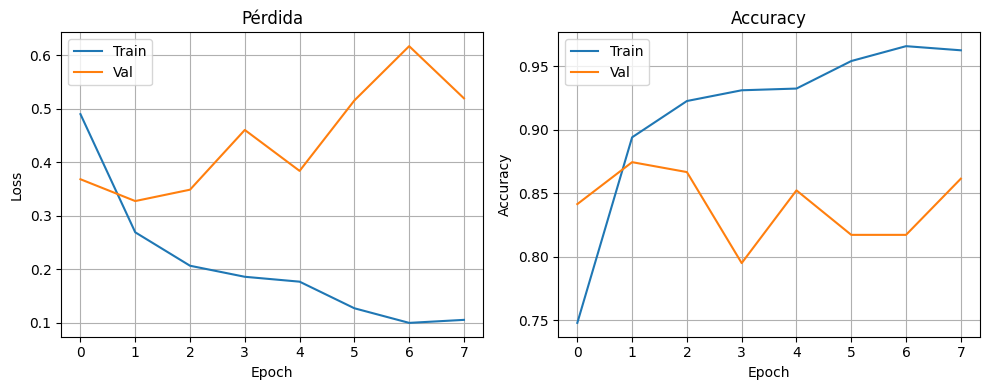

In [6]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Pérdida")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Evaluación en test

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss en test: {test_loss:.4f}")
print(f"Accuracy en test: {test_acc:.4f}")


Loss en test: 0.5226
Accuracy en test: 0.8585


## Matriz de confusión y métricas

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step


<Figure size 500x500 with 0 Axes>

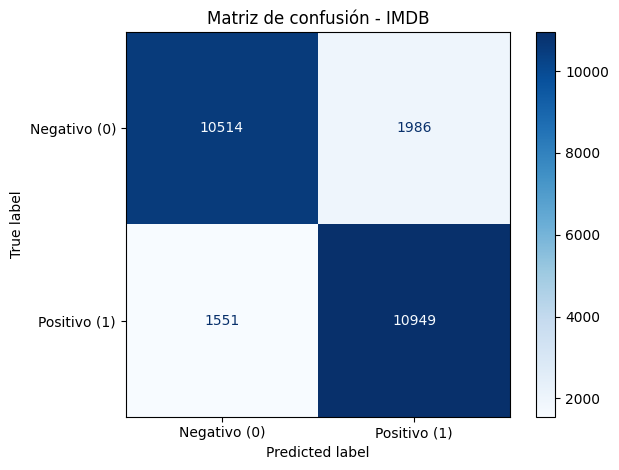

              precision    recall  f1-score   support

    Negativo       0.87      0.84      0.86     12500
    Positivo       0.85      0.88      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [8]:
y_pred_proba = model.predict(x_test).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Negativo (0)", "Positivo (1)"]
)

plt.figure(figsize=(5,5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de confusión - IMDB")
plt.tight_layout()
plt.show()

print(classification_report(
    y_test, y_pred,
    target_names=["Negativo", "Positivo"]
))

## Decodificar reseñas y mostrar ejemplos

In [9]:
word_index = imdb.get_word_index()
index_to_word = {index+3: word for word, index in word_index.items()}
index_to_word[0] = "<PAD>"
index_to_word[1] = "<START>"
index_to_word[2] = "<UNK>"
index_to_word[3] = "<UNUSED>"

def decode_review(encoded_review):
    return " ".join(index_to_word.get(i, "?") for i in encoded_review)

correct_idx = np.where(y_test == y_pred)[0]
incorrect_idx = np.where(y_test != y_pred)[0]

len(correct_idx), len(incorrect_idx)

n = 3
indices = np.random.choice(correct_idx, size=n, replace=False)

for i, idx in enumerate(indices):
    print(f"Ejemplo correcto {i+1}")
    print("Etiqueta real:", y_test[idx])
    print("Predicción:", y_pred[idx])
    print("Probabilidad positiva:", round(y_pred_proba[idx], 4))
    print("Reseña (truncada):")
    print(decode_review(x_test[idx])[:600], "...")
    print("-"*80)

n = 3
n = min(n, len(incorrect_idx))
if n > 0:
    indices = np.random.choice(incorrect_idx, size=n, replace=False)

    for i, idx in enumerate(indices):
        print(f"Ejemplo incorrecto {i+1}")
        print("Etiqueta real:", y_test[idx])
        print("Predicción:", y_pred[idx])
        print("Probabilidad positiva:", round(y_pred_proba[idx], 4))
        print("Reseña (truncada):")
        print(decode_review(x_test[idx])[:600], "...")
        print("-"*80)
else:
    print("No hubo predicciones incorrectas en la muestra.")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Ejemplo correcto 1
Etiqueta real: 1
Predicción: 1
Probabilidad positiva: 0.9997
Reseña (truncada):
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>  ...
--------------------------------------------------------------------------------
Ejemplo correcto 2
Etiqueta real: 0
Predicción: 0
Probabilidad positiva: 0.0002
Reseña (truncada):
populated by characters which have titles in all capital letters ra